In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#generate dataset for regression problem from sklern library

from sklearn.datasets import make_regression
x,y = make_regression(n_samples=50,n_features=5)
x=pd.DataFrame(x)
x.sample(5)

,0,1,2,3,4
41,-0.222166,0.200544,1.239605,-0.208908,0.893028
48,1.631854,-1.325665,0.698990,0.068941,0.134994
43,-1.118768,-0.930753,0.677446,-1.318353,-2.214090
10,-1.525029,0.347733,1.193245,-1.662636,0.748075
20,1.124577,-1.555592,-1.244112,0.074711,-1.594584


In [24]:
#For feature selection to regression problems only

from sklearn.feature_selection import mutual_info_regression   #for calculate the values count between x and y
from sklearn.feature_selection import SelectKBest              #to give how ,many features want to select

In [25]:
# Determine how many features I want 

feature=SelectKBest(score_func=mutual_info_regression,k=4)  ##4 features I want to get
feature.fit(x,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001EB2EAA0680>)

In [26]:
# Get how many details with particular column and y

feature.scores_

array([0.17302442, 0.1753203 , 0.09482479, 0.        , 0.07594785])

In [27]:
# Get how many details with particular column and y with relevant columns

mutual_info_scores=pd.Series(feature.scores_,index=x.columns)
mutual_info_scores

0    0.173024
1    0.175320
2    0.094825
3    0.000000
4    0.075948
dtype: float64

<Axes: >

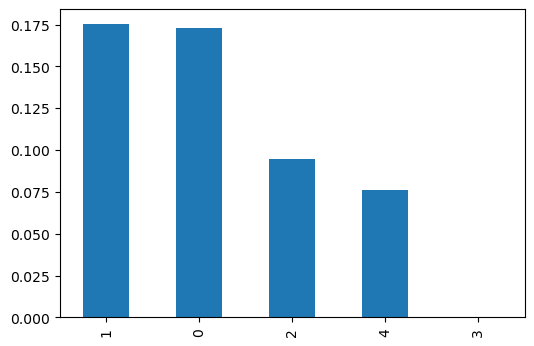

In [28]:
#plot about mutual_info_features

mutual_info_scores.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [29]:
#Get the selected x features only

x_selected=feature.fit_transform(x,y)
x_selected=pd.DataFrame(x_selected)
x_selected.head(5)

,0,1,2,3
0,-1.587855,1.284694,0.150376,0.187331
1,0.057215,-0.278939,0.066936,0.611571
2,-0.756947,-0.174172,-2.359175,1.358283
3,-1.321001,0.026695,0.603682,-0.084344
4,0.837904,-0.455674,-1.561124,-0.456599


In [30]:
x.head(5)

,0,1,2,3,4
0,-1.587855,1.284694,0.150376,0.266679,0.187331
1,0.057215,-0.278939,0.066936,1.360307,0.611571
2,-0.756947,-0.174172,-2.359175,0.675096,1.358283
3,-1.321001,0.026695,0.603682,-0.338065,-0.084344
4,0.837904,-0.455674,-1.561124,-0.258982,-0.456599


In [31]:
#For feature selection to classification problems only

from sklearn.datasets import make_classification    #get the dataset for classification
from sklearn.feature_selection import mutual_info_classif   #for calculate the values count between x and y

In [32]:
x1,y1 = make_classification(n_samples=50,n_features=5,n_informative=2)  #create the datset for clasification and n_informative -> how many classes want to see in the dataset
x1=pd.DataFrame(x1)
x1.sample(5)

,0,1,2,3,4
26,0.536544,-0.711509,1.150267,-0.403384,0.437352
0,-1.013002,-1.588498,-0.133007,-0.307366,-1.514189
24,-0.241259,-0.944112,0.361756,0.611139,-0.493485
28,0.094876,-1.205414,0.954121,-0.852686,-0.176179
22,1.648557,1.867365,0.715559,0.889861,2.295642


In [40]:
y1[:5]  # get y's values upto 5 values only

array([0, 1, 0, 1, 0])

In [43]:
feature1=SelectKBest(score_func=mutual_info_classif,k=4) 
feature1.fit(x1,y1)

SelectKBest(k=4,
            score_func=<function mutual_info_classif at 0x000001EB2EAA07C0>)

<Axes: >

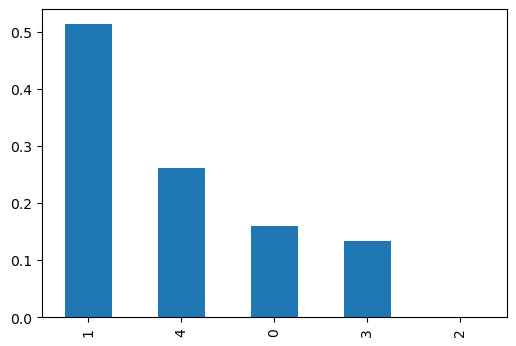

In [44]:
mutual_info_scores1=pd.Series(feature1.scores_,index=x1.columns)
mutual_info_scores1.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [45]:
x_selected1=feature1.fit_transform(x1,y1)
x_selected1=pd.DataFrame(x_selected1)
x_selected1.head(5)

,0,1,2,3
0,-1.013002,-1.588498,-0.307366,-1.514189
1,-0.503991,1.771308,0.542390,-0.151814
2,-1.309033,-1.897191,-1.725471,-1.920164
3,1.554591,1.505892,-0.637810,2.104905
4,-2.071262,-1.419195,1.045179,-2.666589


In [46]:
x1.head(5)

,0,1,2,3,4
0,-1.013002,-1.588498,-0.133007,-0.307366,-1.514189
1,-0.503991,1.771308,-1.847449,0.542390,-0.151814
2,-1.309033,-1.897191,-0.280017,-1.725471,-1.920164
3,1.554591,1.505892,0.852118,-0.637810,2.104905
4,-2.071262,-1.419195,-1.543629,1.045179,-2.666589
